In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler


import imblearn
import warnings
warnings.filterwarnings("ignore")

### Project Week 1 Tasks:

In [2]:
train=pd.read_csv('data/train_data.csv')
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
test_val=pd.read_csv('data/test_data_hidden.csv')
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [4]:
test= pd.read_csv("data/test_data.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


### Exploratory Data Analysis

In [5]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()

(58, 3, 3)

Train dataset contains 58 duplicate records and train dataset contains 3 duplicate records.

In [6]:
train.drop_duplicates(inplace=True)

In [7]:
train.duplicated().sum()

0

In [8]:
train.shape

(3942, 8)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [10]:
test_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


Train dataset contains 10 missing values in 'reviews.title' column and test dataset contains 3 missing values in 'reviews.title' column.

In [11]:
#pd.set_option('display.max_colwidth',200)

Reviews containing Positive Sentiments

In [12]:
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and ...",Greattttttt
4,This is the 3rd one I've purchased. I've bough...,Very durable!
5,This is a great product. Light weight. I wish ...,You will love it
7,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs
8,Bought this for my mom and it was just what sh...,Great tablet
10,"I got this tablet to replace my sons old one, ...",Great Tablet
11,Great product for the kids gaming apps parenta...,Works great
12,Love the choice of colors. Have two kindles of...,great pad for both children and adults


In [14]:
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few ...,Average
6,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet
17,"Not as good as before the old kindle, just sea...",Not as good as before
59,There is nothing spectacular about this item b...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause ...,Haven't set it up yet
114,I bought this as s present for my 65 year old ...,Solid tablet
146,Bought this tablet for 8 year old. It holding ...,Fire tablet
147,bought a few kindles in the past but this time...,Came defective
148,"Not a substitute for an iPad, but a really goo...",Good Reader
187,This device is a good if you are looking for a...,Good for 4 year old


In [15]:
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big a...,Amazon Fire 7 Tablet
121,I bought this Kindle for my 7 year old grand-d...,Kid's Kindle
150,I am reading positive reviews and wish I could...,Have never purchased a more frustrating Device
151,I have to say it was a little confusing and fr...,not big fan
249,It's a good device for children because they d...,Good for kids
267,the speaker voice quality is terrible compare ...,"terrible product,bad voice quality"
368,Needs to be a stand alone device. I should hav...,Needs to be a stand alone device
530,Has a very good Bluetooth speakers sound quali...,Good Bluetooth speaker


In [16]:
train.sentiment.value_counts()

sentiment
Positive    3694
Neutral      158
Negative      90
Name: count, dtype: int64

### Class Imbalance Problem
In the train dataset, we have 3,749 (~95.1%) sentiments labeled as positive, and 1,58 (~4%) sentiments labeled as Neutral and 93(~2.35%) sentiments as Negative. So, it is an imbalanced classification problem.

In [17]:
pd.DataFrame(train.name.value_counts())

,count
name,
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122


In [18]:
#name = pd.DataFrame(train.name.str.split(',').tolist()).stack().unique()
#name = pd.DataFrame(name,columns=['name'])
#name

In [19]:
train.brand.value_counts() , test_val.brand.value_counts()

(brand
 Amazon    3942
 Name: count, dtype: int64,
 brand
 Amazon    1000
 Name: count, dtype: int64)

In [20]:
train.primaryCategories.value_counts()

primaryCategories
Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: count, dtype: int64

In [21]:
test_val.primaryCategories.value_counts()

primaryCategories
Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: count, dtype: int64

In [22]:
pd.DataFrame(train.categories.value_counts())

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162


In [23]:
#categories = pd.DataFrame(train.categories.str.split(',').tolist()).stack().unique()
#categories = pd.DataFrame(categories,columns=['Categories'])
#categories

In [24]:
train.dtypes


name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

### Data Cleaning

In [25]:
# Removing brand column
del train['brand']
del test_val['brand']
del test['brand']

# New columns - Day, Month, Year from date column 
train['reviews.date'] = train['reviews.date'].str.split('T').str[0]
test_val['reviews.date'] = test_val['reviews.date'].str.split('T').str[0]
test['reviews.date'] = test['reviews.date'].str.split('T').str[0]

train['reviews_day'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.day
train['reviews_month'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.month
train['reviews_year'] = pd.to_datetime(train['reviews.date'], format='%Y-%m-%d').dt.year

test_val['reviews_day'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.day
test_val['reviews_month'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.month
test_val['reviews_year'] = pd.to_datetime(test_val['reviews.date'], format='%Y-%m-%d').dt.year

test['reviews_day'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.day
test['reviews_month'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.month
test['reviews_year'] = pd.to_datetime(test['reviews.date'], format='%Y-%m-%d').dt.year

del train['reviews.date']
del test['reviews.date']
del test_val['reviews.date']

train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016
1,Amazon - Echo Plus w/ Built-In Hub - Silver,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...","eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...","Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017


In [26]:
# Lebel Encoding for item names, categories, primary categories
name = list(set(list(train['name'])+list(test_val['name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)

In [27]:
# Missing Values 
train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

In [28]:
# Text data cleaning : reviews.text, reviews.title

tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 

for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner) 

In [29]:
test[['reviews.text','reviews.title']].head(10)

,reviews.text,reviews.title
0,amazon kindle fire free used that want online ...,very handy device
1,echo show great addition amazon family work ju...,another winner from amazon
2,great value from best bought christmas sale,simple reliable
3,mine email facebook game line also have down l...,love
4,this fantastic item person bought love,fantastic
5,this great devise reading book taking photo be...,book reader
6,have enjoyed learning about home automation us...,first experience with alexa
7,nice size very clear randomly shuts cant remov...,great size
8,awesome product cool design great color would ...,great gift
9,love mine work great with prime have best movie,great


### Visualization

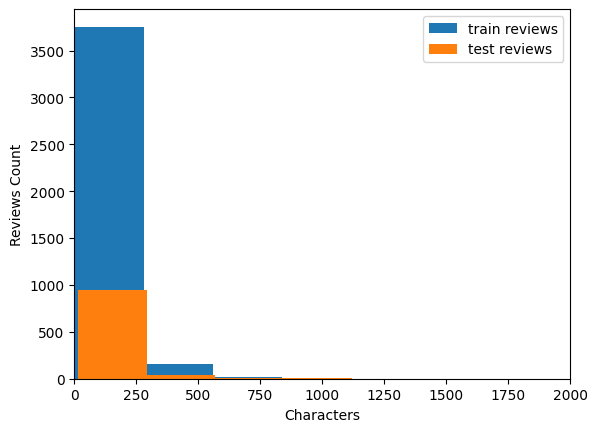

In [30]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,2000)
plt.xlabel('Characters')
plt.ylabel('Reviews Count')
plt.show()

In [31]:
all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

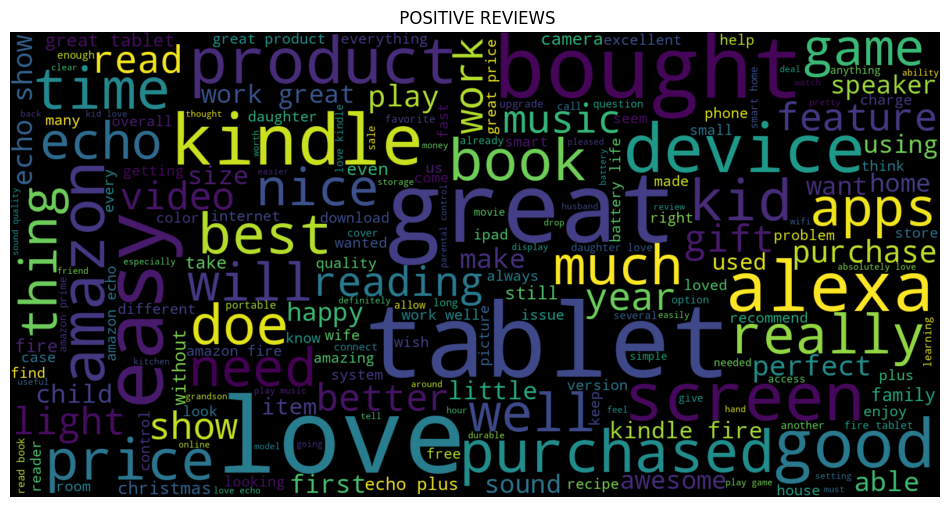

In [32]:
wordcloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

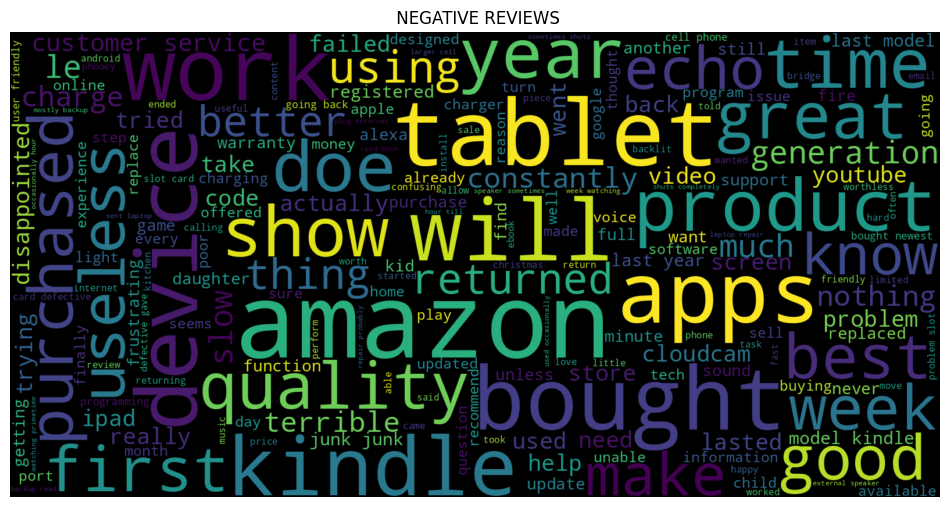

In [33]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()

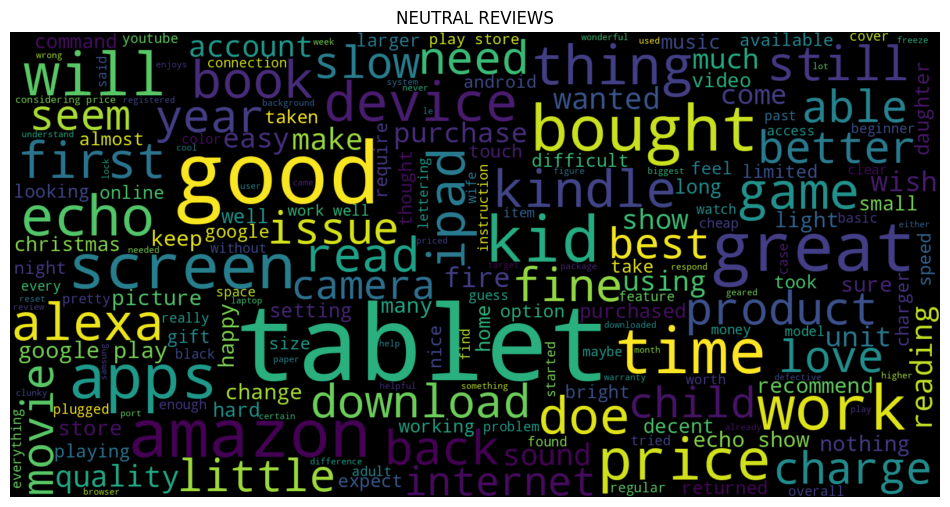

In [34]:
wordcloud = WordCloud(height=800, width=1600, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

In [35]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

In [36]:
train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,10,0,purchased black fridaypros great price even sa...,powerful tablet,2,26,12,2016
1,5,1,1,purchased amazon echo plus dot plus four fire ...,amazon echo plus awesome,2,17,1,2018
2,9,2,1,just average alexa option doe show thing scree...,average,1,20,12,2017
3,14,22,3,very good product exactly what wanted very goo...,greattttttt,2,4,8,2017
4,13,9,0,this purchased bought niece other case compare...,very durable,2,23,1,2017


### TFIDF Vectorizer

In [37]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

In [38]:
# Preparing Features X(text,title) and Label y(sentiment)

train1 = train.reset_index()
combi1=pd.concat([train1,test_val],axis=0,join='outer')

tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values
y_train1=train['sentiment'].values

x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [39]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

tvec3 = TfidfVectorizer(stop_words = list(stop_words), tokenizer = tokenize, max_features = 1000)

reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names_out()

### Multinomial Naive Bayes

In [40]:
nb = MultinomialNB()
nb.fit(Train1.values,train1['sentiment'])
y_pred = nb.predict(Test_Val1.values)
y_val = test_val['sentiment']
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000

93.7


Everything is classified as Positive because of Imbalance Class

### Project Week 2 Tasks:

#### Tackling Class Imbalance Problem:

In [41]:
train.sentiment.value_counts()

sentiment
2    3694
1     158
0      90
Name: count, dtype: int64

In [42]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]
count_2, count_1, count_0

(3694, 158, 90)

#### 1. UnderSampling

In [43]:
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 9)
sentiment
2    158
1    158
0     90
Name: count, dtype: int64


#### 2. OverSampling


In [44]:
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 9)
sentiment
2    3694
0    3694
1    3694
Name: count, dtype: int64


In [45]:
lr= LogisticRegression(C=30, class_weight='balanced', solver='sag', 
                         multi_class='multinomial', n_jobs=6, random_state=40, 
                         verbose=1, max_iter=1000)

#### TFIDF Vectorizer for under-sampled data

In [46]:
train = train_under.reset_index(drop=True) 
#combi = train.append(test_val,ignore_index=True)
combi=pd.concat([train,test_val],axis=0,join='outer')
print(combi.shape)

tvec1.fit(combi['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(combi['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

(1406, 9)


### Logistic Regression for under-sampled data

In [47]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 2.09535880
Epoch 3, change: 1.68128025
Epoch 4, change: 1.05206383
Epoch 5, change: 0.35889910
Epoch 6, change: 0.19051625
Epoch 7, change: 0.15281286
Epoch 8, change: 0.12820296
Epoch 9, change: 0.11332084
Epoch 10, change: 0.10328602
Epoch 11, change: 0.09427695
Epoch 12, change: 0.08591916
Epoch 13, change: 0.07931387
Epoch 14, change: 0.09427482
Epoch 15, change: 0.06604364
Epoch 16, change: 0.06385154
Epoch 17, change: 0.06045598
Epoch 18, change: 0.05575177
Epoch 19, change: 0.05221448
Epoch 20, change: 0.04967637
Epoch 21, change: 0.04703915
Epoch 22, change: 0.04458489
Epoch 23, change: 0.04233325
Epoch 24, change: 0.04042072
Epoch 25, change: 0.03875398
Epoch 26, change: 0.03717104
Epoch 27, change: 0.03571484
Epoch 28, change: 0.03424833
Epoch 29, change: 0.03291947
Epoch 30, change: 0.03171909
Epoch 31, change: 0.03053207
Epoch 32, change: 0.02942160
Epoch 33, change: 0.02846745
Epoch 34, change: 0.02752049
Epoch 35, change: 0.026

0.5097975429602534


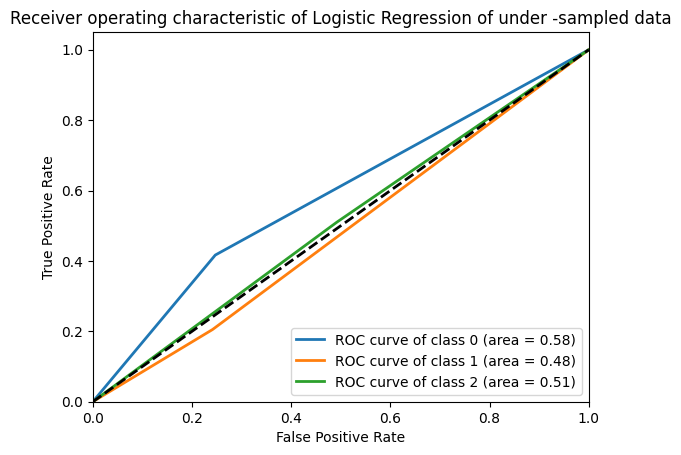

In [50]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression of under -sampled data')
plt.legend(loc="lower right")
plt.show()

#### TFIDF Vectorizer for over-sampled data

In [51]:
train = train_over.reset_index(drop=True) 

tvec1.fit(train['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())

tvec2.fit(train['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())

Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

Train.to_csv('Train.csv',encoding='utf-8')
Test_Val.to_csv('Test_Val.csv',encoding='utf-8')

x_train=Train.values
y_train=train['sentiment'].values
x_val=Test_Val.values
y_val = test_val['sentiment'].values

### Logistic Regression for over-sampled data

In [52]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.46959057
Epoch 3, change: 0.31827171
Epoch 4, change: 0.20936723
Epoch 5, change: 0.15089050
Epoch 6, change: 0.11629673
Epoch 7, change: 0.09515955
Epoch 8, change: 0.07139759
Epoch 9, change: 0.05272328
Epoch 10, change: 0.04316314
Epoch 11, change: 0.03604143
Epoch 12, change: 0.03035473
Epoch 13, change: 0.02546566
Epoch 14, change: 0.02159169
Epoch 15, change: 0.01864298
Epoch 16, change: 0.01605068
Epoch 17, change: 0.01408367
Epoch 18, change: 0.01239876
Epoch 19, change: 0.01146221
Epoch 20, change: 0.01135111
Epoch 21, change: 0.01125249
Epoch 22, change: 0.01116902
Epoch 23, change: 0.01109489
Epoch 24, change: 0.01102795
Epoch 25, change: 0.01096797
Epoch 26, change: 0.01091566
Epoch 27, change: 0.01086934
Epoch 28, change: 0.01082774
Epoch 29, change: 0.01078994
Epoch 30, change: 0.01075564
Epoch 31, change: 0.01072486
Epoch 32, change: 0.01069679
Epoch 33, change: 0.01067128
Epoch 34, change: 0.01064818
Epoch 35, change: 0.010

/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression on over-sampled data is perfrorming better than under-sampled data

0.5872012741655234


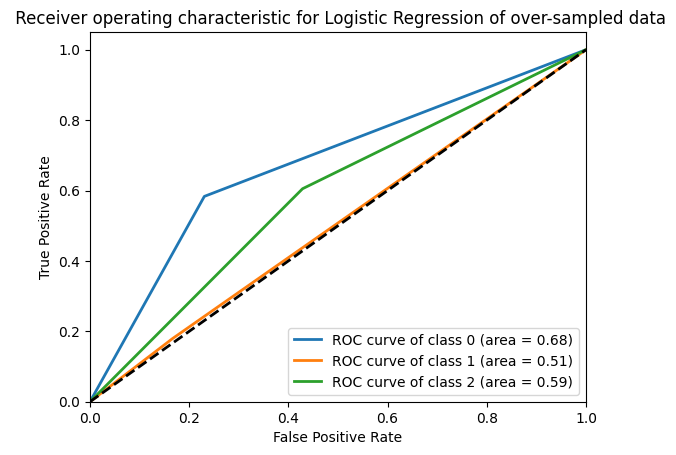

In [53]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic for Logistic Regression of over-sampled data')
plt.legend(loc="lower right")
plt.show()

### Multinomial Naive Bayes

In [54]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   2   9]
 [  3  15  21]
 [ 10  81 846]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.15      0.38      0.22        39
           2       0.97      0.90      0.93       937

    accuracy                           0.87      1000
   macro avg       0.54      0.61      0.56      1000
weighted avg       0.92      0.87      0.90      1000

87.4
0.9590326655838296
0.874


0.7120607426966282


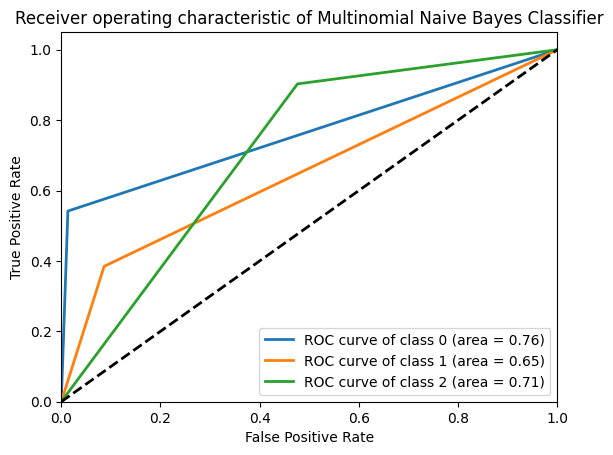

In [55]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Multinomial Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()


### Random Forest Classifier

In [56]:
rf= RandomForestClassifier(n_estimators=400,random_state=10).fit(x_train,y_train)
y_pred=rf.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print('accuracy : ',accuracy_score(y_val, y_pred)*100)
print(rf.score(x_train,y_train))
print(rf.score(x_val,y_val))

[[  7   0  17]
 [  0  10  29]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       937

    accuracy                           0.95      1000
   macro avg       0.98      0.52      0.61      1000
weighted avg       0.96      0.95      0.94      1000

accuracy :  95.39999999999999
1.0
0.954


0.6349206349206349


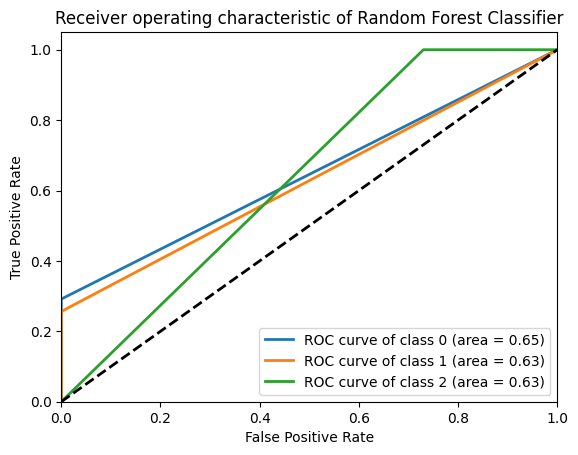

In [57]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

### XGBClassifier

In [58]:
xgb= XGBClassifier(n_estimators=1000,max_depth=6).fit(x_train,y_train)
y_pred=xgb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 10   2  12]
 [  2  12  25]
 [  2   4 931]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        24
           1       0.67      0.31      0.42        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.78      0.57      0.64      1000
weighted avg       0.94      0.95      0.94      1000

accuracy :  95.3


0.7011782778423573


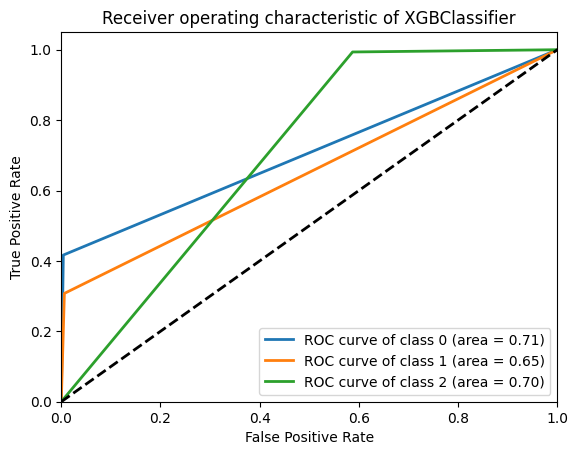

In [59]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of XGBClassifier')
plt.legend(loc="lower right")
plt.show()

We can see that XGBoost is performing better in predicting all the classes.

### Multi-class SVM

In [60]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0).fit(x_train, y_train) 
y_pred=svc.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 13   2   9]
 [  5  15  19]
 [ 20  47 870]]
              precision    recall  f1-score   support

           0       0.34      0.54      0.42        24
           1       0.23      0.38      0.29        39
           2       0.97      0.93      0.95       937

    accuracy                           0.90      1000
   macro avg       0.52      0.62      0.55      1000
weighted avg       0.93      0.90      0.91      1000

accuracy :  89.8


0.7394761239335923


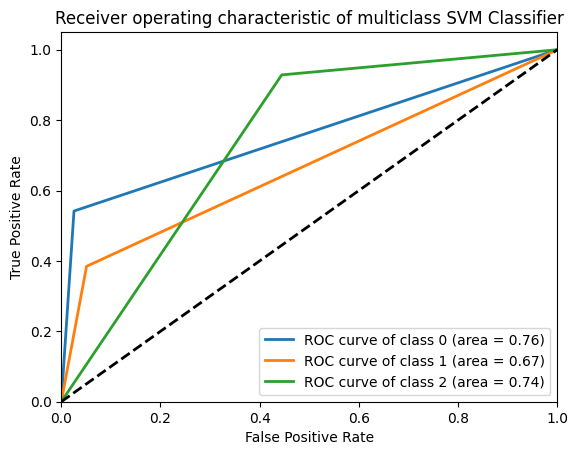

In [61]:
lb = LabelBinarizer()
lb.fit(y_val)
y_val1 = lb.transform(y_val)
y_pred1 = lb.transform(y_pred)
print(roc_auc_score(y_val1, y_pred1, average='weighted'))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_val1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw=2
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multiclass SVM Classifier')
plt.legend(loc="lower right")
plt.show()

## Project Task: Week 3
### Neural Network

In [62]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])

In [63]:
#The model with sequential API
classifier = Sequential()
classifier.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=80,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
#Compile and Run
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,verbose=0)
#Evaluate
y_pred = classifier.predict(x_val1, batch_size=256)

# Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors
# predictions are the probabilities, and when np.argmax(..) is applied, it gives the predicted label.
y_pred_bool = np.argmax(y_pred, axis=1)
# label
y_test = np.argmax(y_val1, axis=1) # one hot encoding to a single number for test set

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


4/4 [==============================] - 0s 3ms/step
[[ 12   2  10]
 [  1  10  28]
 [  1   5 931]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.59      0.26      0.36        39
           2       0.96      0.99      0.98       937

    accuracy                           0.95      1000
   macro avg       0.80      0.58      0.66      1000
weighted avg       0.94      0.95      0.94      1000



In [64]:

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 14.6, 1: 8.316455696202532, 2: 0.35571196534921495}

In [65]:
# Using Class-Weights
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 0s 2ms/step
[[ 13   3   8]
 [  3  14  22]
 [  8  28 901]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        24
           1       0.31      0.36      0.33        39
           2       0.97      0.96      0.96       937

    accuracy                           0.93      1000
   macro avg       0.61      0.62      0.61      1000
weighted avg       0.93      0.93      0.93      1000



Using class-weights does not improve the performance

In [66]:
#using dropouts
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train1.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train1,y_train2,batch_size=256,epochs=100,class_weight=class_weight_dict,verbose=0)
y_pred = classifier.predict(x_val1, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 0s 2ms/step
[[ 24   0   0]
 [ 39   0   0]
 [937   0   0]]
              precision    recall  f1-score   support

           0       0.02      1.00      0.05        24
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00       937

    accuracy                           0.02      1000
   macro avg       0.01      0.33      0.02      1000
weighted avg       0.00      0.02      0.00      1000



/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

Using drop out chances of predicting second class increases

In [67]:
y_train3 = label_binarize(y_train, classes=[0, 1, 2])

In [68]:
#for over-sampled data
classifier = Sequential()
classifier.add(Dense(units=50,activation='relu',input_dim=x_train.shape[1]))
classifier.add(Dense(units=40,activation='relu'))
classifier.add(Dense(units=150,activation='relu'))
classifier.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train3,batch_size=256,epochs=10,verbose=0)
y_pred = classifier.predict(x_val, batch_size=256)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 0s 2ms/step
[[ 12   4   8]
 [  2  17  20]
 [  7  76 854]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.18      0.44      0.25        39
           2       0.97      0.91      0.94       937

    accuracy                           0.88      1000
   macro avg       0.57      0.62      0.57      1000
weighted avg       0.93      0.88      0.90      1000



Using Over-sampled data for neural network does not improve the performance

### ensemble technique using Voting Classifier: XGboost + oversampled_multinomial_NB

In [69]:
from sklearn.ensemble import VotingClassifier
model1 = MultinomialNB()
model2 =  XGBClassifier(n_estimators=1000,max_depth=6)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print("accuracy : ",accuracy_score(y_val, y_pred)*100)

[[ 14   1   9]
 [  4  16  19]
 [ 12  83 842]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        24
           1       0.16      0.41      0.23        39
           2       0.97      0.90      0.93       937

    accuracy                           0.87      1000
   macro avg       0.53      0.63      0.56      1000
weighted avg       0.92      0.87      0.89      1000

accuracy :  87.2


We can see that the above model performs almost same as oversampled multinomial model but it increases the chances of prediction of minority classes.

### Sentiment Score

In [70]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment 
def polarity(x):
    return TextBlob(x).polarity+1
 
train['senti_score'] = train['reviews.text'].apply(senti)
test_val['senti_score'] = test_val['reviews.text'].apply(senti)

train['polarity'] =train['reviews.text'].apply(polarity)
test_val['polarity'] = test_val['reviews.text'].apply(polarity)

train.senti_score.head()

0     (0.37479166666666663, 0.6791666666666667)
1    (0.45821428571428574, 0.49821428571428567)
2                    (0.69, 0.6033333333333335)
3                              (0.1875, 0.4375)
4                   (0.6000000000000001, 0.725)
Name: senti_score, dtype: object

In [71]:
Train = pd.concat([train.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment','senti_score'],axis=1),tvec_text2, tvec_title2],axis=1)
x_train=Train.values
y_train=train['sentiment']
x_val=Test_Val.values
y_val = test_val['sentiment']

In [72]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

[[ 13   2   9]
 [  3  15  21]
 [ 10  80 847]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.15      0.38      0.22        39
           2       0.97      0.90      0.93       937

    accuracy                           0.88      1000
   macro avg       0.54      0.61      0.56      1000
weighted avg       0.92      0.88      0.90      1000

87.5
0.9593033748420863
0.875


Sentiment Score does not have much affect on the performance

### Project Task: Week 4
#### LSTM

In [73]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 4
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(5000, emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)

print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/4
16/16 [==============================] - 373s 23s/step - loss: 0.7868 - accuracy: 0.8280
Epoch 2/4
16/16 [==============================] - 389s 24s/step - loss: 0.3115 - accuracy: 0.9371
Epoch 3/4
16/16 [==============================] - 382s 24s/step - loss: 0.2793 - accuracy: 0.9371
Epoch 4/4
10/10 [==============================] - 17s 2s/step
[[  0   0  24]
 [  0   0  39]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [74]:
#using clas_weights
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
                                                  classes=np.unique(y_train1),
                                                  y=y_train1)
   
class_weights_dict = dict(enumerate(class_weights))
emb_dim = 128                                                 
epochs = 4
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size,class_weight=class_weights_dict)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))


Epoch 1/4
16/16 [==============================] - 386s 24s/step - loss: 1.1021 - acc: 0.2240
Epoch 2/4
16/16 [==============================] - 389s 24s/step - loss: 1.1036 - acc: 0.3113
Epoch 3/4
16/16 [==============================] - 385s 24s/step - loss: 1.1045 - acc: 0.2861
Epoch 4/4
10/10 [==============================] - 18s 2s/step
[[  0  24   0]
 [  0  39   0]
 [  0 937   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.04      1.00      0.08        39
           2       0.00      0.00      0.00       937

    accuracy                           0.04      1000
   macro avg       0.01      0.33      0.03      1000
weighted avg       0.00      0.04      0.00      1000



/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jigishap/.pyenv/versions/lewagon/envs/AI_Proj/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [75]:
#for over_sampled data
y_train2 = label_binarize(y_train, classes=[0, 1, 2])
emb_dim = 128                                                 
epochs = 3
batch_size = 256
model = Sequential()
model.add(Embedding(x_train.shape[1], emb_dim, input_length=x_train.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

Epoch 1/3
44/44 [==============================] - 1005s 23s/step - loss: 1.1003 - acc: 0.3317
Epoch 2/3
 5/44 [==>...........................] - ETA: 15:43 - loss: 1.0993 - acc: 0.3344

#### GRU

In [ ]:
y_train2 = label_binarize(y_train1, classes=[0, 1, 2])
epochs = 3
emb_dim = 128
batch_size = 256
model = Sequential()
model.add(Embedding(x_train1.shape[1], emb_dim, input_length=x_train1.shape[1]))
#model.add(SpatialDropout1D(0.7))
model.add(GRU(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit(x_train1, y_train2, epochs=epochs, batch_size=batch_size)
y_pred = model.predict(x_val1, batch_size=100)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_val1, axis=1)
print(confusion_matrix(y_test, y_pred_bool))
print(classification_report(y_test, y_pred_bool))

We can see from above that LSTM and GPU models are not efficient in predicting minor classes. ANN is performing quite good in solving class imbalance problem but it cannot beat traditional ML agorithms.

### Clustering of Reviews

In [ ]:
print(words[250:300])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(reviews)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As no proper elbow is generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

### 11 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 11, n_init = 20) 
kmeans.fit(reviews)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

### 13 Clusters

In [ ]:
kmeans = KMeans(n_clusters = 13, n_init = 20) 
kmeans.fit(reviews)
# We look at 13 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

### Topic Modelling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(reviews)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, tvec3, number_words)